The purpose of this exercise is to analyze [the political books network](http://www-personal.umich.edu/~mejn/netdata)


In [5]:
import networkx as nx
from networkx.algorithms import community
import pandas as pd
%matplotlib inline

In [2]:
# Read the network data
net = nx.read_gml('data/polbooks.gml')

In [3]:
len(net.nodes)

105

In [4]:
len(net.edges)

441

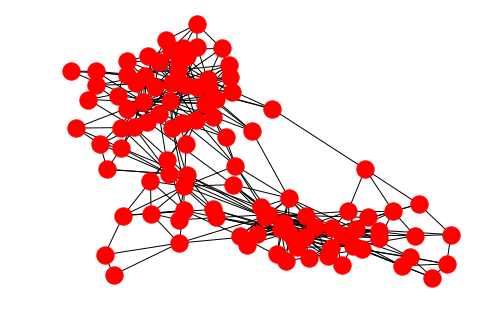

In [8]:
nx.draw(net)

# What books are purchased with `Worse Than Watergate`?

In [14]:
net['Worse Than Watergate']

AtlasView({'The Price of Loyalty': {}, 'House of Bush, House of Saud': {}, 'The Sorrows of Empire': {}, 'Against All Enemies': {}, 'American Dynasty': {}, 'Big Lies': {}, 'The Lies of George W. Bush': {}, 'Plan of Attack': {}, 'Bush at War': {}, 'The New Pearl Harbor': {}, 'Bushwomen': {}, 'The Politics of Truth': {}, 'Fanatics and Fools': {}, 'Bushwhacked': {}, 'The Exception to the Rulers': {}, 'Freethinkers': {}})

In [5]:
list(net.neighbors("Worse Than Watergate"))

['The Price of Loyalty',
 'House of Bush, House of Saud',
 'The Sorrows of Empire',
 'Against All Enemies',
 'American Dynasty',
 'Big Lies',
 'The Lies of George W. Bush',
 'Plan of Attack',
 'Bush at War',
 'The New Pearl Harbor',
 'Bushwomen',
 'The Politics of Truth',
 'Fanatics and Fools',
 'Bushwhacked',
 'The Exception to the Rulers',
 'Freethinkers']

# What is the shortest path between `MoveOn's 50 Ways to Love Your Country` and `Empire`?

In [6]:
nx.shortest_path(net)["MoveOn's 50 Ways to Love Your Country"]["Empire"]

["MoveOn's 50 Ways to Love Your Country",
 'American Dynasty',
 'The Great Unraveling',
 'Rogue Nation',
 'Empire']

In [24]:
nx.shortest_path(net, "MoveOn's 50 Ways to Love Your Country", "Empire")

["MoveOn's 50 Ways to Love Your Country",
 'American Dynasty',
 'The Great Unraveling',
 'Rogue Nation',
 'Empire']

# What are the top 5 central books? Use different centrality measures and compare

In [21]:
degree = pd.Series(nx.degree_centrality(net)).sort_values(ascending=False)
betweenness = pd.Series(nx.betweenness_centrality(net)).sort_values(ascending=False)

In [22]:
degree.head()

A National Party No More    0.240385
Off with Their Heads        0.240385
Losing Bin Laden            0.221154
Bushwhacked                 0.221154
American Dynasty            0.211538
dtype: float64

In [23]:
betweenness.head()

The Price of Loyalty    0.139478
The Bushes              0.103649
Bush Country            0.098395
Off with Their Heads    0.095262
American Dynasty        0.090934
dtype: float64

# Using community detection, uncover communities from the network, what do they mean?

In [25]:
communities = community.greedy_modularity_communities(net)

In [26]:
communities

[frozenset({'1000 Years for Revenge',
            'A National Party No More',
            'Arrogance',
            'Betrayal',
            'Bias',
            'Breakdown',
            'Bush Country',
            'Bush vs. the Beltway',
            "Charlie Wilson's War",
            'Dangerous Dimplomacy',
            'Deliver Us from Evil',
            'Dereliction of Duty',
            'Endgame',
            'Fighting Back',
            'Ghost Wars',
            'Give Me a Break',
            'Hating America',
            "Hillary's Scheme",
            'Hollywood Interrupted',
            'Legacy',
            'Let Freedom Ring',
            'Losing Bin Laden',
            'Meant To Be',
            'Off with Their Heads',
            'Persecution',
            'Power Plays',
            "Rumsfeld's War",
            'Shut Up and Sing',
            'Slander',
            'Sleeping With the Devil',
            'Spin Sisters',
            'Tales from the Left Coast',
            'Ten 